In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
df=pd.read_csv('Housing.csv')
print("First five rows from start",df.head())
print("first five Rows from End",df.tail())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000 

In [23]:
print("Shape of Dataset",df.shape)
print("Number of columns in Dataset",df.columns)
print("General information about Dataset",df.info())
print(df.describe())
print("Number of Missing values in each columns",df.isnull().sum())
print("Dulicate rows in Dataset",df.duplicated().sum())

num_features=df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical Features are ",num_features)
cat_features=df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical Features are : ",cat_features)

Shape of Dataset (545, 13)
Number of columns in Dataset Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545

In [21]:
 print(df.nunique())
 print(df[df.duplicated()])
 for i in df.columns:
    print(f"Number of unique values  ",df[i].value_counts())

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []
Number of unique values   price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64
Number of unique values   area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64
Number of unique values   bedrooms
3    300
2    136
4     95
5    

In [27]:
# Checking for Constant columns if any 
for col in df.columns:
    if(df[col].nunique()<=1):
        print("constant columns are ",end=" ")

# Checking for id-like Columns if any
for col in df.columns:
    if "id" in col.lower() and df[col].nunique==df.shape[0]:
        print(f"id like column is {col}")

In [32]:
# # Checking for outliers in numerical Features
# for col in num_features:
#     sns.boxplot(data=df,x=col)
#     plt.title('Box Plot to detect Outliers')
#     plt.show()
# Removing Outliers using IQR Method
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers removed in '{col}': {outliers.shape[0]}")

    # Remove them
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    


Outliers removed in 'price': 15
Outliers removed in 'area': 13
Outliers removed in 'bedrooms': 11
Outliers removed in 'bathrooms': 123
Outliers removed in 'stories': 12
Outliers removed in 'parking': 6


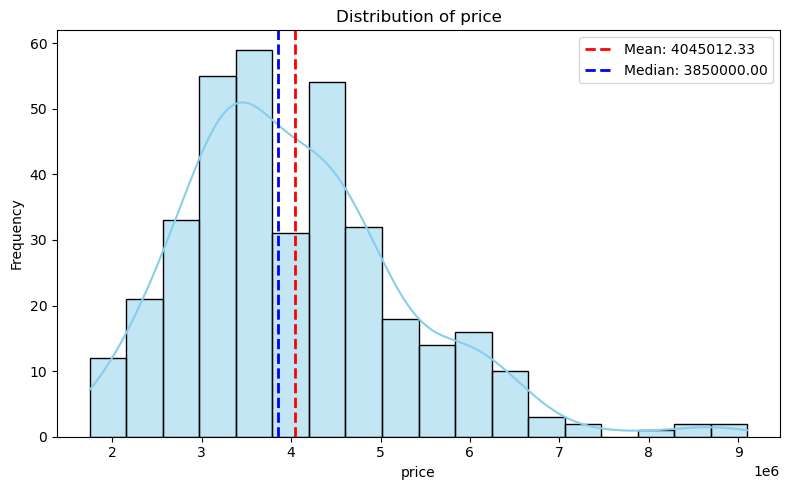

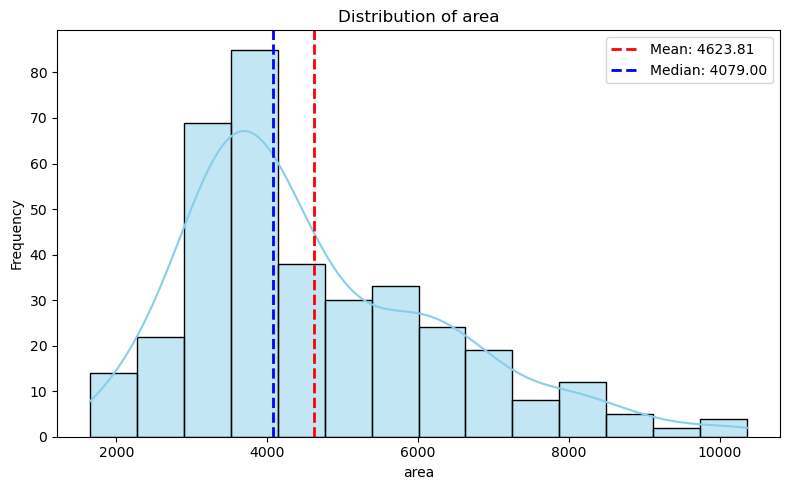

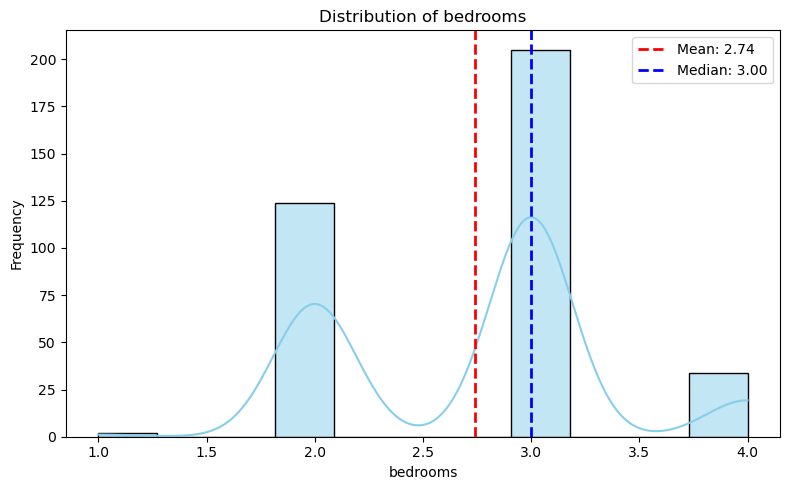

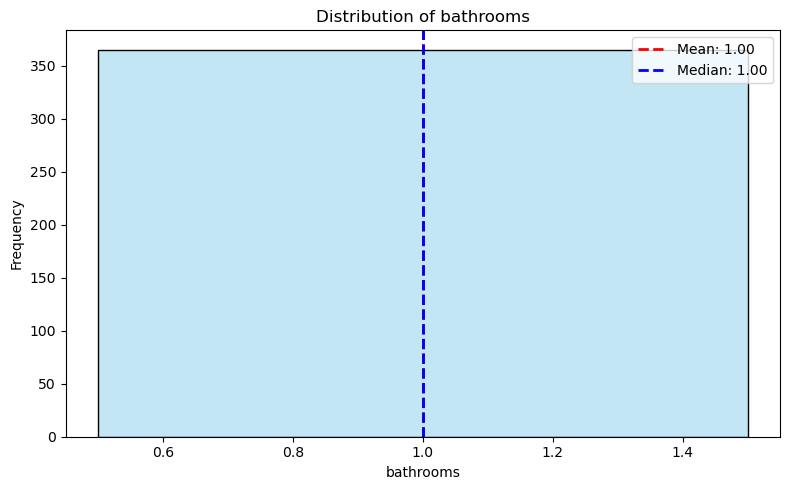

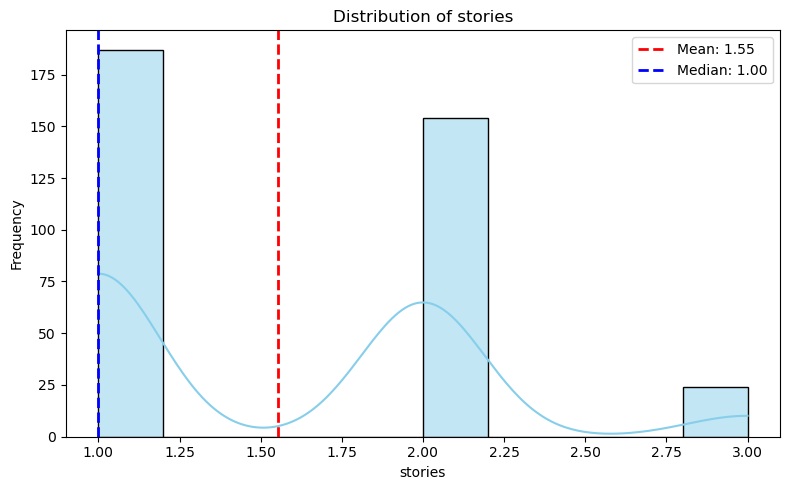

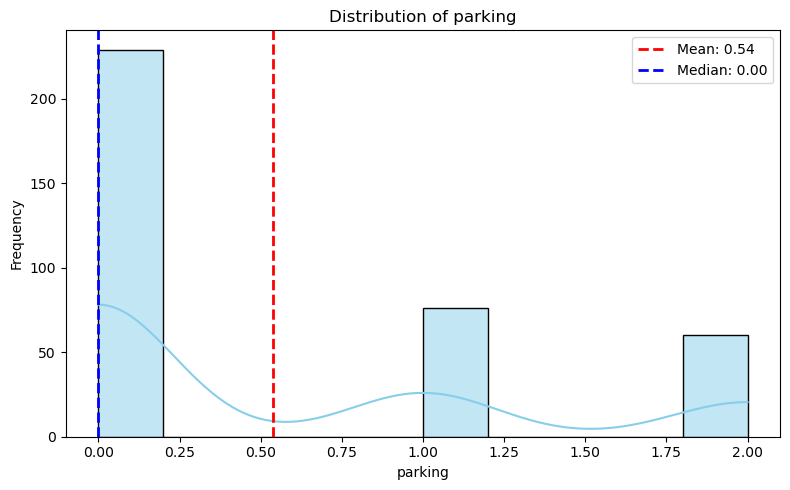

parking      1.003060
area         0.952023
price        0.893901
stories      0.645462
bedrooms     0.111158
bathrooms    0.000000
dtype: float64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, color="skyblue")
    mean_value = df[col].mean()
    median_value = df[col].median()
    plt.axvline(
        mean_value,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {mean_value:.2f}",
    )
    plt.axvline(
        median_value,
        color="blue",
        linestyle="--",
        linewidth=2,
        label=f"Median: {median_value:.2f}",
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Checking Skewness of each numerical features
df[num_features].skew().sort_values(ascending=False)


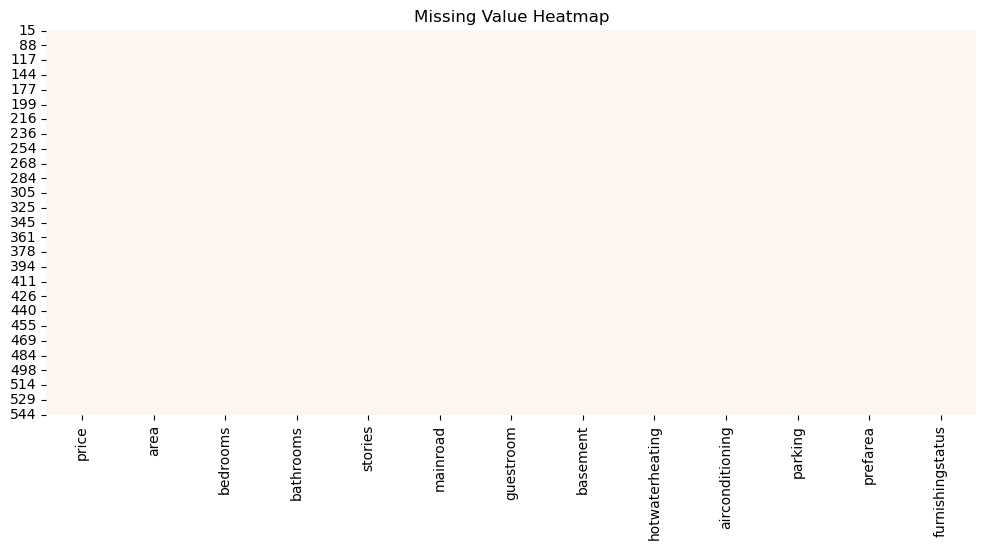

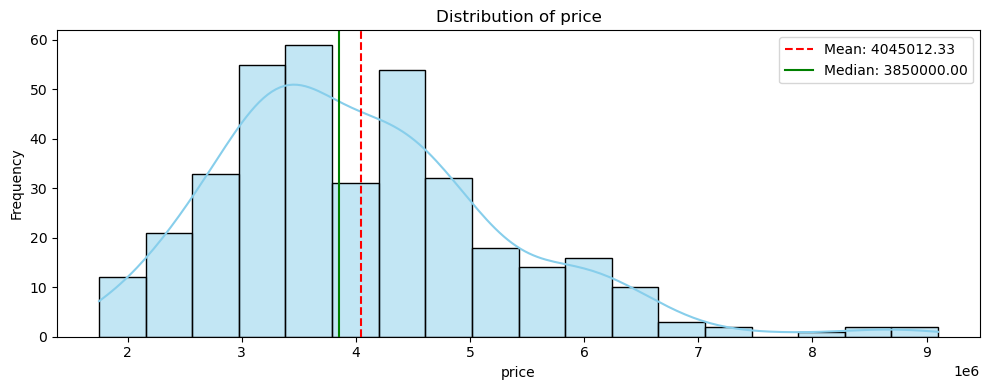

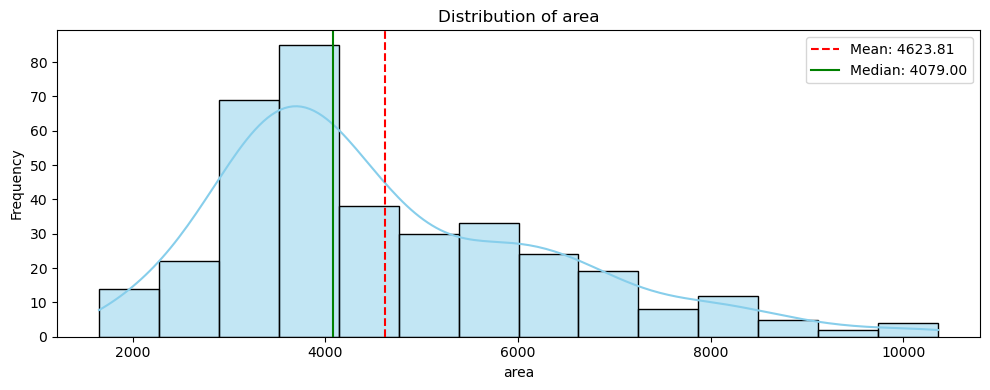

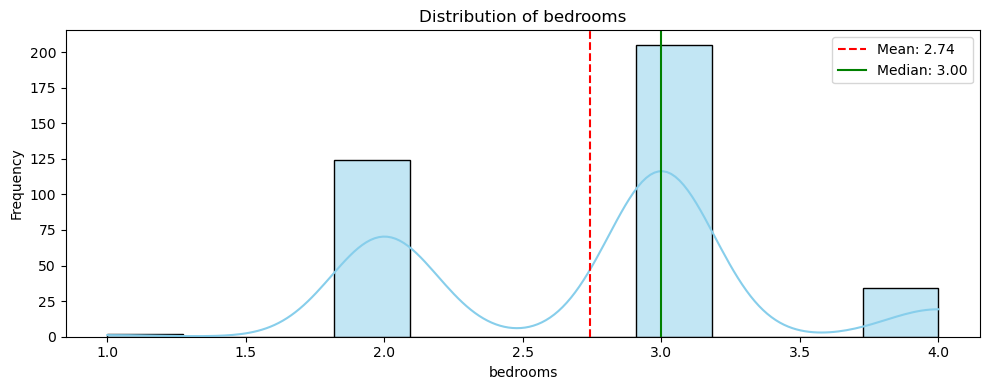

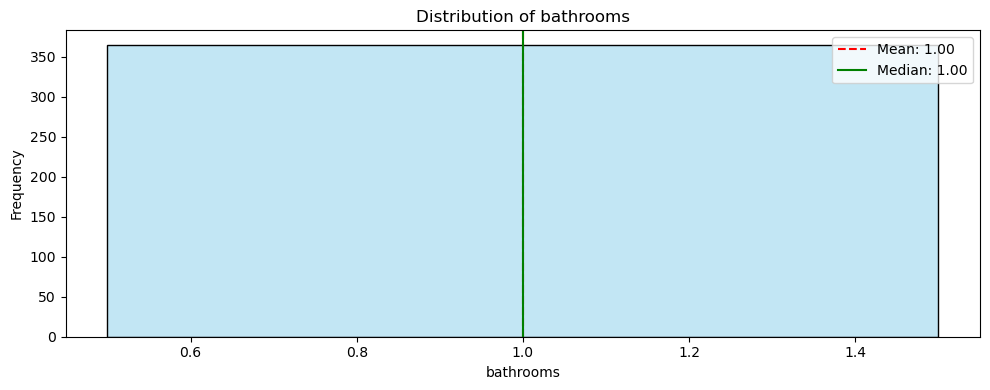

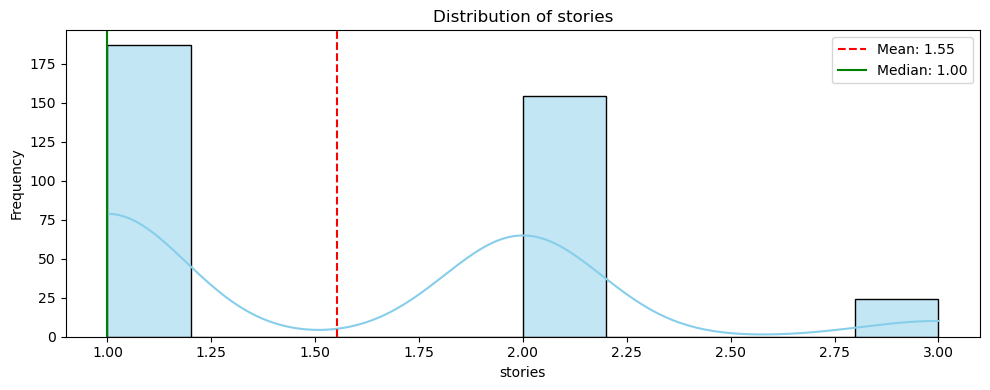

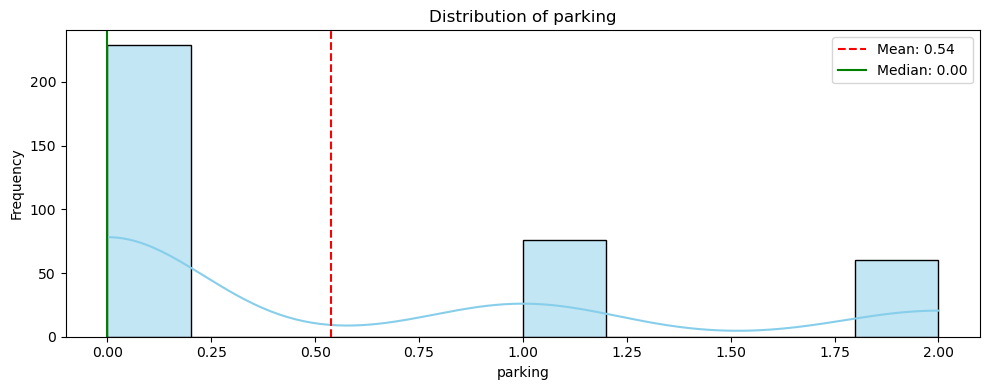

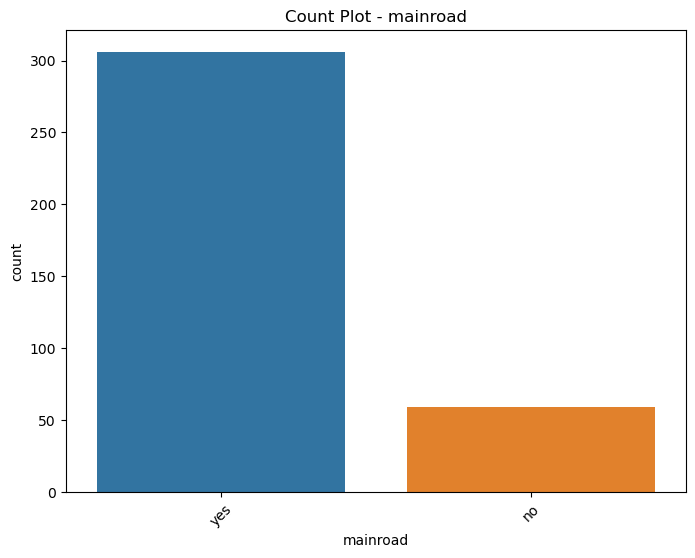

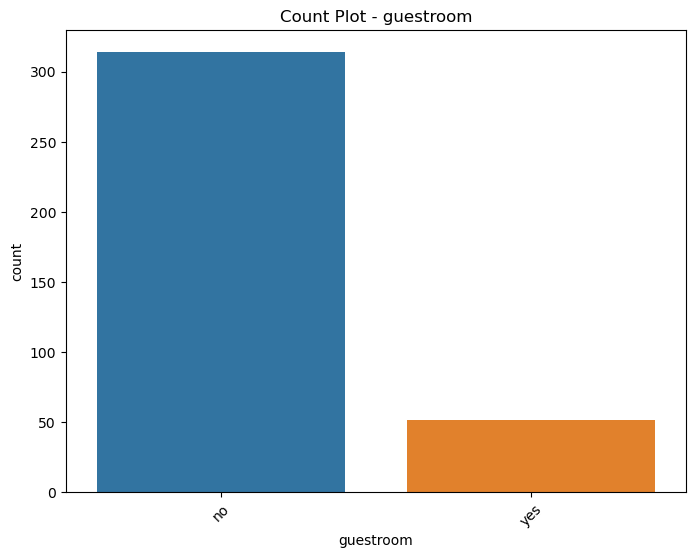

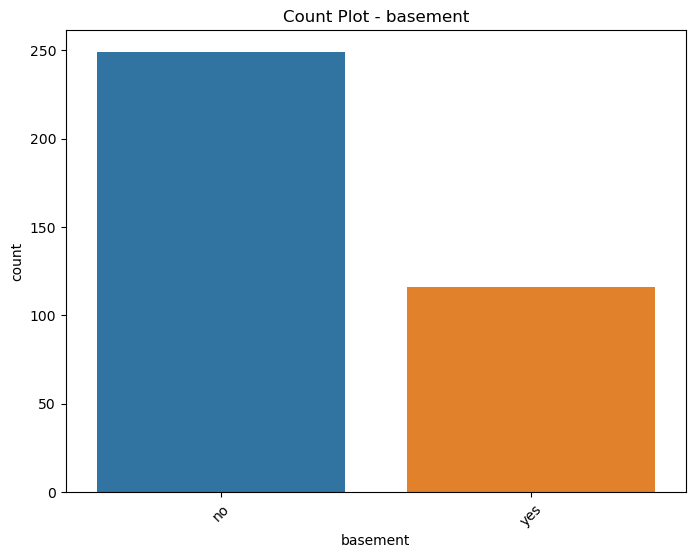

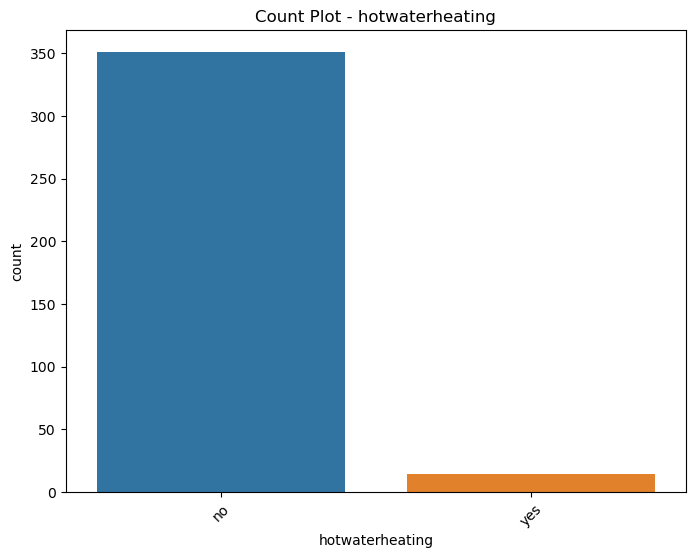

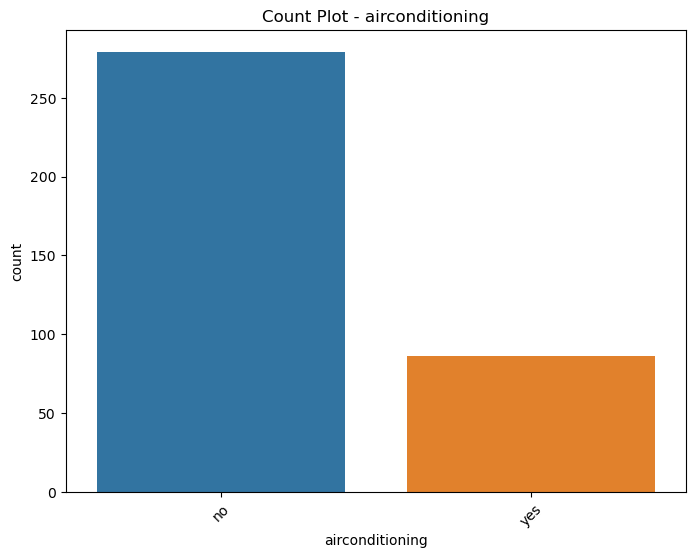

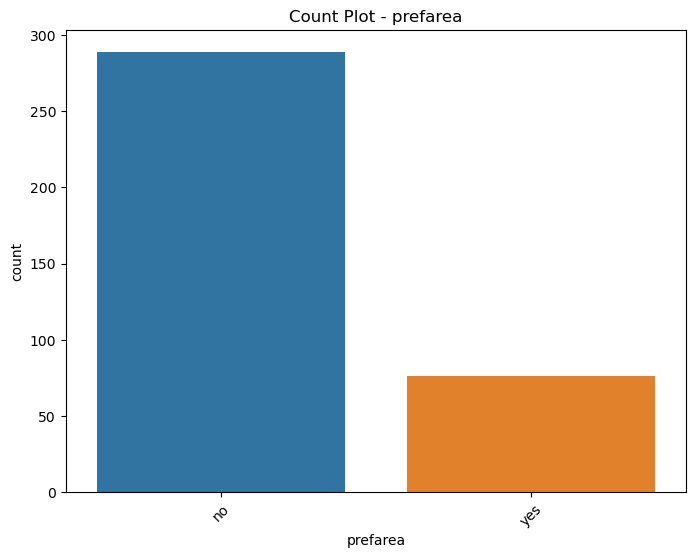

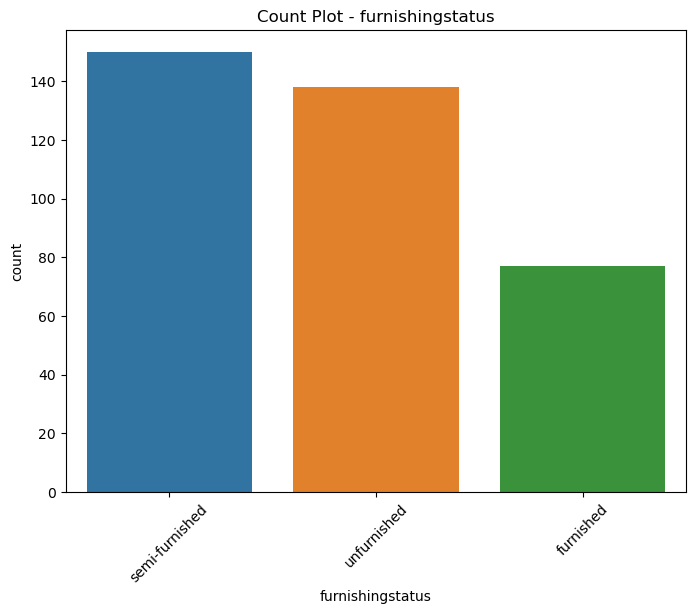

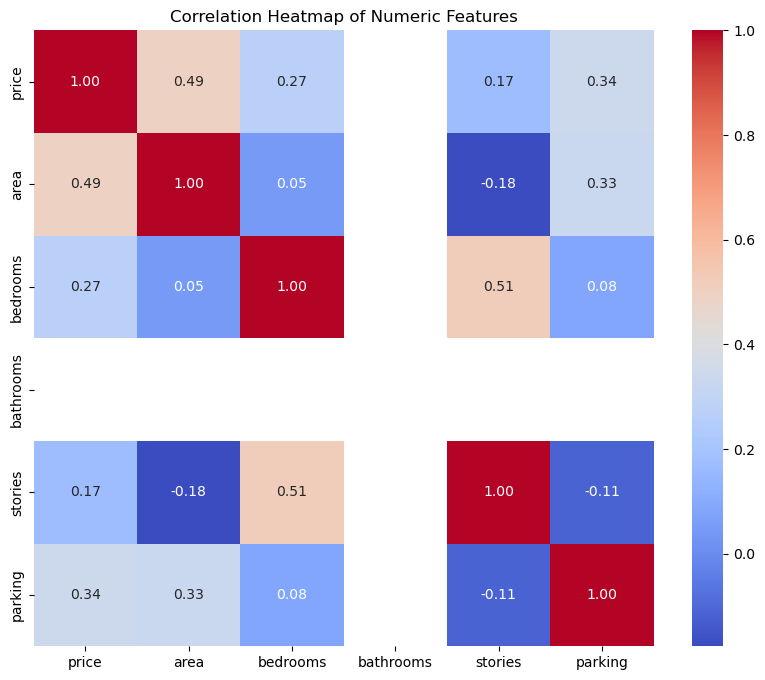

<Figure size 640x480 with 0 Axes>

In [77]:
# EDA 

# Missing Value Heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Value Heatmap")
plt.show()
# Histogram and Box Plots for Numerical features
for col in num_features:
    mean_val = df[col].mean()
    median_val = df[col].median()

    plt.figure(figsize=(10, 4))
    sns.histplot(df, x=col, bins="auto", kde=True, color="skyblue", edgecolor="black")
    

    # Mean and Median lines
    plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.2f}")
    plt.axvline(
        median_val, color="green", linestyle="-", label=f"Median: {median_val:.2f}"
    )

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Count-Plots of Categorical Features 
for col in cat_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot - {col}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation Heatmap
# Heatmap of correlations (using numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()
    plt.clf()


In [75]:
# Selecting features (both numeric and categorical) and the target variable
target = "price"
features = ["area", "bedrooms", "bathrooms", "stories", "parking"] + cat_features
model_df = df[features + [target]].copy()

# One-hot encode the categorical columns
model_df_encoded = pd.get_dummies(model_df, columns=cat_features, drop_first=True)
print("Shape of the model dataframe after encoding:", model_df_encoded.shape)


Shape of the model dataframe after encoding: (365, 14)


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = model_df_encoded.drop(columns=[target])
y = model_df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X, y)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print("Model Performance on Test Set:")
print(f"R² Score       : {r2:.4f}")
print(f"MAE (Avg Error): {mae:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")


Model Performance on Test Set:
R² Score       : 0.5356
MAE (Avg Error): 689329.01
MSE            : 990911860122.80
RMSE           : 995445.56


In [86]:
print(y_pred[9])
print(y_test.iloc[9])

4692114.134721628
4382000


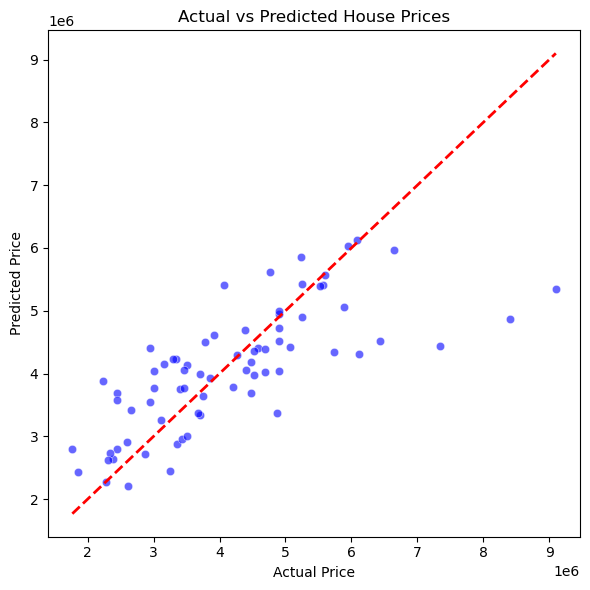

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)

# Ideal line: perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()
